## Import Libraries

In [ ]:
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
import random                               # for random sampling in range(),number_of_values

import tensorflow as tf

In [2]:
# For mounting google drive to collab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Extracting the data from the zip file
DATASET_PATH =   "/content/drive/MyDrive/Colab_TS_DATA/" # Insert Data Path here relative to current working directory
os.chdir(DATASET_PATH)
print(os.getcwd())
# Extracting Training Data
with zipfile.ZipFile('BelgiumTSC_Training.zip', 'r') as zipObj:
    zipObj.extractall('TrainingData')
# Extracting Testing Data
with zipfile.ZipFile('BelgiumTSC_Testing.zip', 'r') as zipObj:
    zipObj.extractall('TestingData')
print('SucessFully Extracted DataFiles!')

C:\Users\Rashmi\Desktop\task
SucessFully Extracted DataFiles!


In [4]:
# Function to read image and its corresponding labels from the training and testing folder

import PIL
import cv2
def load_images(data_directory):
  
  # lists to store Images and labels
    images = []
    labels = []
    log_index = 0
  # get list of all directories present in the data_directory path
    directories = [dir for dir in os.listdir(data_directory)
                 if os.path.isdir(os.path.join(data_directory,dir))] # to make sure that we include only directories and not any files present in the folder
    print(len(directories))
    for dir in directories:
        current_directory = os.path.join(data_directory,dir)
    # Gather all fileNames in the given directory to load images into images array using sklearn
        file_names = [os.path.join(current_directory,file) 
                  for file in os.listdir(current_directory)
                  if file.endswith('.ppm')
                 ]
    
        # Load all given Images into the Images array
        for file in file_names:
            images.append(cv2.imread(file))
            labels.append(int(dir))
            log_index+=1
      # print('Loading File: {0}'.format(log_index))
    print('Successfully Loadded  {0} images!'.format(len(images)))
    return np.array(images),np.array(labels)

In [5]:
# LOAD IMAGES 
  
ROOT_PATH = os.getcwd()  
print(ROOT_PATH)
TRAININ_DATA_PATH = "/content/drive/MyDrive/Colab_TS_DATA/TrainingData/Training"  
TEST_DATA_PATH = "/content/drive/MyDrive/Colab_TS_DATA/TestingData/Testing"
  
training_images, training_labels = load_images(TRAININ_DATA_PATH)
print('Training Data Sucessfully Loaded!!')
testing_images,testing_labels = load_images(TEST_DATA_PATH)
print('Test data sucessfully loaded!!')

/content
62
Successfully Loadded  4575 images!
Training Data Sucessfully Loaded!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


62
Successfully Loadded  2520 images!
Test data sucessfully loaded!!


In [6]:
index =10                       # the index to check out the shape of input images
print('Dimension of Image at index ' + str(index) + ':', training_images[index].shape)  
print('Number of training Images :' , training_images.size)
print('Number of Dimensions of Images array : ',training_images.ndim)                 # ndims - number of dimensions for np array images

print('Dimensions for labels :', training_labels.shape)
print('Label for Image at index ' + str(index) +': ',training_labels[index])
print('Number of Classes : ',len(set(training_labels)))

print('Some additional tidbits about the memory requirements of data ')
print('Size of an individual image: ' ,training_images.itemsize)


Dimension of Image at index 10: (240, 249, 3)
Number of training Images : 4575
Number of Dimensions of Images array :  1
Dimensions for labels : (4575,)
Label for Image at index 10:  0
Number of Classes :  62
Some additional tidbits about the memory requirements of data 
Size of an individual image:  8


In [7]:
# Function to transform the image dimensions

def transform_images(images,height,width):
    transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
    return  np.array(transformed_images)


In [8]:
# Importing train test split to split the dataset into train test and validation
from sklearn.model_selection import train_test_split

In [9]:
print(training_images[0].shape)
print(training_images.size)
full_data = np.append(training_images,testing_images)
full_labels = np.append(training_labels,testing_labels)
print('Collated Image Data size :',full_data.shape)
print('Collated Image Labels size :',full_labels.shape)

(141, 142, 3)
4575
Collated Image Data size : (7095,)
Collated Image Labels size : (7095,)


In [13]:
# Using train test split to first spliting into train and test

train_images_split,test_images_split,train_labels_split,test_labels_split = train_test_split(full_data,full_labels,stratify = full_labels,test_size = 0.2)
print('Train Image Split dims: ',train_images_split.size)
print('Train Labels Split dims: ',train_labels_split.size)
print('Test Image Split dims: ',test_images_split.size)
print('Test Labels Split dims: ',test_labels_split.size)

Train Image Split dims:  5676
Train Labels Split dims:  5676
Test Image Split dims:  1419
Test Labels Split dims:  1419


In [14]:
# From train set spliting again to create a validation set

train_images_split,val_images_split,train_labels_split,val_labels_split = train_test_split(train_images_split,train_labels_split,stratify = train_labels_split,test_size = 0.2)
print('Train Image Split dims: ',train_images_split.size)
print('Train Labels Split dims: ',train_labels_split.size)
print('Test Image Split dims: ',val_images_split.size)
print('Test Labels Split dims: ',val_labels_split.size)

Train Image Split dims:  4540
Train Labels Split dims:  4540
Test Image Split dims:  1136
Test Labels Split dims:  1136


In [15]:
# Changing the dimension of image to get each image with same height and width

import skimage.transform

train_split_images = transform_images(train_images_split,128,128)
test_split_images = transform_images(test_images_split,128,128)
val_split_images = transform_images(val_images_split,128,128)

In [16]:
# A function to show image along with its class number

def show_images_of_all_classes(train_images,training_labels):
    num_cols =  8
    classes = len(set(training_labels))
    if classes % num_cols == 0:
        num_rows =  classes / num_cols
    else:
        num_rows = int(classes / num_cols) + 1
    plt.figure(figsize=(15,15))
    i = 1
    for class_number in set(training_labels):

        indices = np.where(training_labels == class_number)
        plt.subplot(num_rows,num_cols, i)
        i += 1
        plt.axis('off')
        plt.imshow(train_images[indices[0][1]])
        plt.title('Class :{0} [{1}] '.format(class_number,len(indices[0])))   #np.count_nonzero(labels == labels[index])))
    plt.show()

In [17]:
# Printing the class numbers
print(set(full_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


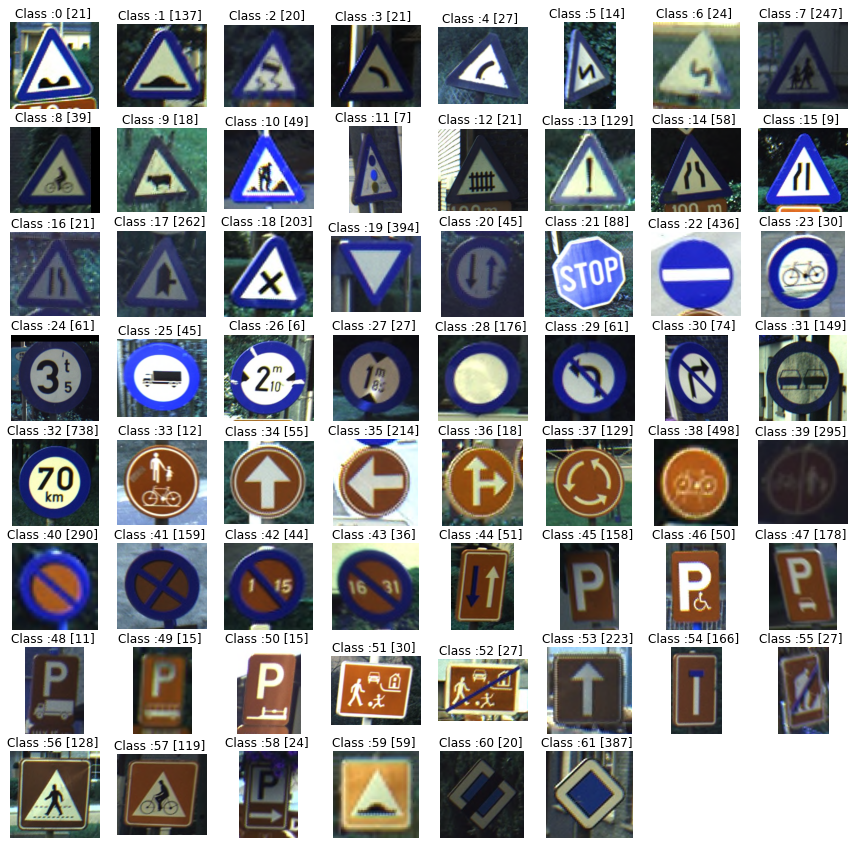

In [19]:
# Show a each images from different class

show_images_of_all_classes(full_data,full_labels)

In [20]:
# Create a dictionary with Class Names
classnames = {
              0 : 'Warning for a bad road surface',
              1 : 'Warning for a speed bump',
              2 : 'Warning for a slippery road surface',
              3 : 'Warning for a curve to the left',
              4 : 'Warning for a curve to the right',
              5 : 'Warning for a double curve, first left then right',                                                    # Merge Classes 5 & 6 later
              6 : 'Warning for a double curve, first left then right',
              7 : 'Watch out for children ahead',
              8 : 'Watch out for  cyclists',
              9 : 'Watch out for cattle on the road',
              10: 'Watch out for roadwork ahead',
              11: 'Traffic light ahead',
              12: 'Watch out for railroad crossing with barriers ahead',
              13: 'Watch out ahead for unknown danger',
              14: 'Warning for a road narrowing',
              15: 'Warning for a road narrowing on the left',
              16: 'Warning for a road narrowing on the right',
              17: 'Warning for side road on the right',
              18: 'Warning for an uncontrolled crossroad',
              19: 'Give way to all drivers',
              20: 'Road narrowing, give way to oncoming drivers',
              21: 'Stop and give way to all drivers',
              22: 'Entry prohibited (road with one-way traffic)',
              23: 'Cyclists prohibited',
              24: 'Vehicles heavier than indicated prohibited',
              25: 'Trucks prohibited',
              26: 'Vehicles wider than indicated prohibited',
              27: 'Vehicles higher than indicated prohibited',
              28: 'Entry prohibited',
              29: 'Turning left prohibited',
              30: 'Turning right prohibited',
              31: 'Overtaking prohibited',
              32: 'Driving faster than indicated prohibited (speed limit)',
              33: 'Mandatory shared path for pedestrians and cyclists',
              34: 'Driving straight ahead mandatory',
              35: 'Mandatory left',
              36: 'Driving straight ahead or turning right mandatory',
              37: 'Mandatory direction of the roundabout',
              38: 'Mandatory path for cyclists',
              39: 'Mandatory divided path for pedestrians and cyclists',
              40: 'Parking prohibited',
              41: 'Parking and stopping prohibited',
              42: '',
              43: '',
              44: 'Road narrowing, oncoming drivers have to give way',
              45: 'Parking is allowed',
              46: 'parking for handicapped',
              47: 'Parking for motor cars',
              48: 'Parking for goods vehicles',
              49: 'Parking for buses',
              50: 'Parking only allowed on the sidewalk',
              51: 'Begin of a residential area',
              52: 'End of the residential area',
              53: 'Road with one-way traffic',
              54: 'Dead end street',
              55: '', 
              56: 'Crossing for pedestrians',
              57: 'Crossing for cyclists',
              58: 'Parking exit',
              59: 'Information Sign : Speed bump',
              60: 'End of the priority road',
              61: 'Begin of a priority road'
    }

In [21]:
# Training Data Generator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,
                                                                   width_shift_range=0.3,
                                                                   height_shift_range=0.2,
                                                                   shear_range=0.25,fill_mode='nearest')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()


In [22]:
 #Ready our generators for passing into models 
train_generator = training_datagen.flow(train_split_images,train_labels_split,batch_size=32)

validation_generator = validation_datagen.flow(val_split_images,val_labels_split,batch_size=32)

Labels: [29, 29, 29, 29, 29, 29, 29, 29, 29, 29]


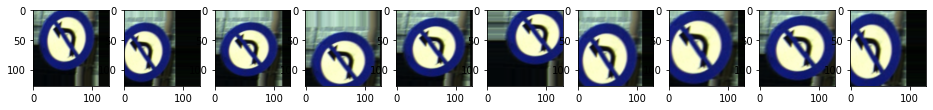

In [23]:
# try and visualize your images

nyan_generator = training_datagen.flow(train_split_images[1:2], train_labels_split[1:2],batch_size=1)

sign = [next(nyan_generator) for i in range(0,10)]
fig, ax = plt.subplots(1,10, figsize=(16, 6))
print('Labels:', [item[1][0] for item in sign])
l = [ax[i].imshow(sign[i][0][0]) for i in range(0,10)]

## Define the model

Defining a 2Dconvolutional neural netwok model with 5 CNN layers with maxpool layers and 2 fully connected layer and a softfax layer 

In [24]:
def conv_net(train_images_dims,num_of_classes,filter_size = 2,num_convolutions=64,num_strides=2):
  # pre process image dimensions
    if (len(train_images_dims) == 3):    # Channel Last
        train_images_dims = (train_images_dims[1],train_images_dims[2])   
    elif (len(train_images_dims) == 4):
        train_images_dims = (train_images_dims[1],train_images_dims[2],train_images_dims[3])

    model  = tf.keras.Sequential()

    #Conv1
    model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu',input_shape= train_images_dims))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

    #Conv2
    model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

    #Conv3
    model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

    #Conv4
    model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

    #Conv5
    model.add(tf.keras.layers.Conv2D(int(num_convolutions) ,(filter_size,filter_size),activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

    #Flatten and add Dense Layer
    model.add(tf.keras.layers.Flatten())
    #Dense 1
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    #Dense 2
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))

    #Output Layer
    model.add(tf.keras.layers.Dense(num_of_classes,activation = 'softmax'))
    return model

In [25]:
monitor = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           patience = 8,
                                           restore_best_weights = True, 
                                           min_delta = 0.01)

In [26]:
model_regularized = conv_net(train_split_images.shape,len(set(train_labels_split)),
                             filter_size=2,num_convolutions=512)

In [27]:
model_regularized.compile(optimizer=tf.keras.optimizers.Adam(), 
                          loss='sparse_categorical_crossentropy',
                          metrics = ['accuracy'])
model_regularized.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 512)     6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 512)       1049088   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 512)       1049088   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 512)       1

In [28]:
history = model_regularized.fit_generator(train_generator, validation_data=validation_generator,
                                          steps_per_epoch=(len(train_split_images) / 32),
                                          epochs = 52,verbose=1,callbacks=[monitor])  # 32 = batch size

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/52
141/141 [==============================] - 57s 345ms/step - loss: 3.7782 - accuracy: 0.0810 - val_loss: 3.1829 - val_accuracy: 0.1849
Epoch 2/52
141/141 [==============================] - 46s 323ms/step - loss: 3.1363 - accuracy: 0.1830 - val_loss: 2.6655 - val_accuracy: 0.2887
Epoch 3/52
141/141 [==============================] - 46s 326ms/step - loss: 2.6627 - accuracy: 0.2687 - val_loss: 2.0136 - val_accuracy: 0.4014
Epoch 4/52
141/141 [==============================] - 46s 323ms/step - loss: 2.2695 - accuracy: 0.3516 - val_loss: 1.6318 - val_accuracy: 0.5194
Epoch 5/52
141/141 [==============================] - 46s 325ms/step - loss: 1.9303 - accuracy: 0.4451 - val_loss: 1.3704 - val_accuracy: 0.5915
Epoch 6/52
141/141 [==============================] - 46s 324ms/step - loss: 1.6592 - accuracy: 0.5057 - val_loss: 1.2202 - val_accuracy: 0.6303
Epoch 7/52
141/141 [==============================] - 46s 324ms/step - loss: 1.4299 - accuracy: 0.5670 - val_loss: 1.0133 - val_ac

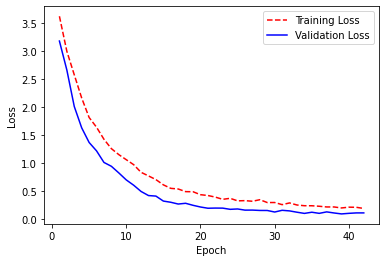

In [31]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])



plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


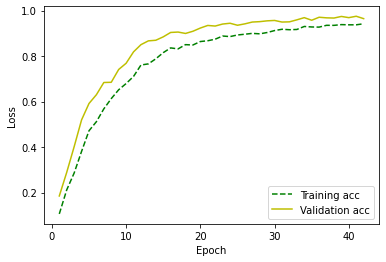

In [32]:

training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'g--')
plt.plot(epoch_count, validation_acc, 'y-')
plt.legend(['Training acc', 'Validation acc'])


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Predicting on TestSet Images

In [33]:
indexes = []
for label in set(test_labels_split):
        indexes.append(np.where(test_labels_split == label)[0])
   #indexes = [ind[0][0] for ind in indexes]
print(len(indexes))
id  = []
for i in indexes:
    id.append(i.flat[0])

class_wise_test_img = test_split_images[id]
class_wise_test_labels = test_labels_split[id]
print(class_wise_test_img.shape)

62
(62, 128, 128, 3)


In [34]:
# Evaluating the trained model for testset

model_regularized.evaluate(test_split_images,test_labels_split)

45/45 [==============================] - 4s 91ms/step - loss: 0.0968 - accuracy: 0.9718


[0.09681772440671921, 0.9718111157417297]

### We got accuracy of 97% and loss of 0.096 while evaluating the model for test images

In [35]:
# Class wise image test
model_regularized.evaluate(class_wise_test_img,class_wise_test_labels)

2/2 [==============================] - 1s 603ms/step - loss: 0.3479 - accuracy: 0.8710


[0.34793707728385925, 0.8709677457809448]

### To show prediction and actual label along with test images

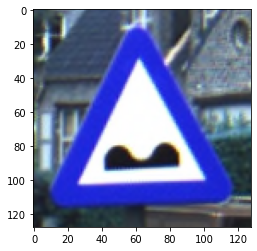

PREDICTION : The Image belongs to class : 0, with description : Warning for a bad road surface
ACTUAL : The Image belongs to class : 0, with description : Warning for a bad road surface


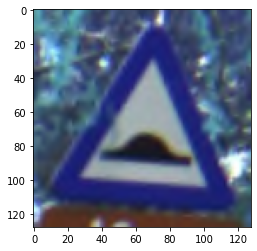

PREDICTION : The Image belongs to class : 1, with description : Warning for a speed bump
ACTUAL : The Image belongs to class : 1, with description : Warning for a speed bump


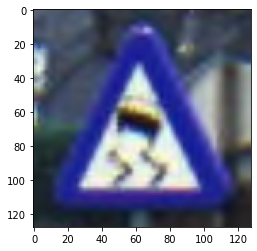

PREDICTION : The Image belongs to class : 2, with description : Warning for a slippery road surface
ACTUAL : The Image belongs to class : 2, with description : Warning for a slippery road surface


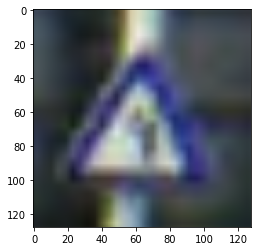

PREDICTION : The Image belongs to class : 3, with description : Warning for a curve to the left
ACTUAL : The Image belongs to class : 3, with description : Warning for a curve to the left


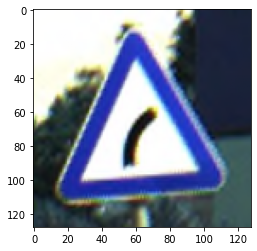

PREDICTION : The Image belongs to class : 4, with description : Warning for a curve to the right
ACTUAL : The Image belongs to class : 4, with description : Warning for a curve to the right


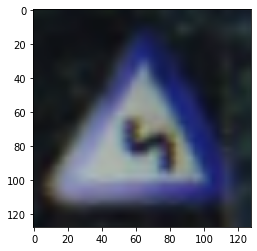

PREDICTION : The Image belongs to class : 14, with description : Warning for a road narrowing
ACTUAL : The Image belongs to class : 5, with description : Warning for a double curve, first left then right


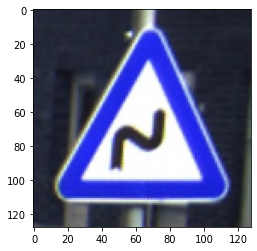

PREDICTION : The Image belongs to class : 6, with description : Warning for a double curve, first left then right
ACTUAL : The Image belongs to class : 6, with description : Warning for a double curve, first left then right


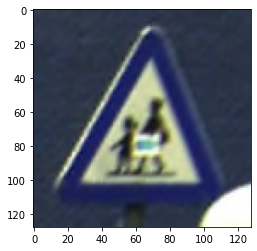

PREDICTION : The Image belongs to class : 7, with description : Watch out for children ahead
ACTUAL : The Image belongs to class : 7, with description : Watch out for children ahead


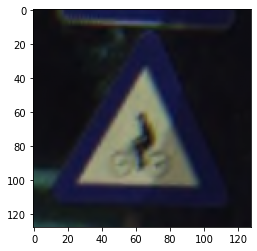

PREDICTION : The Image belongs to class : 8, with description : Watch out for  cyclists
ACTUAL : The Image belongs to class : 8, with description : Watch out for  cyclists


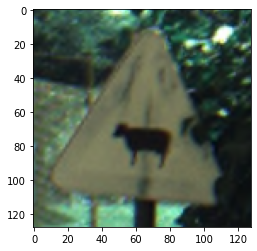

PREDICTION : The Image belongs to class : 9, with description : Watch out for cattle on the road
ACTUAL : The Image belongs to class : 9, with description : Watch out for cattle on the road


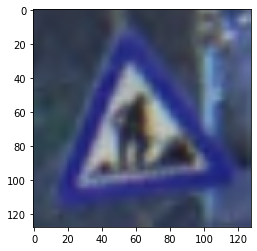

PREDICTION : The Image belongs to class : 10, with description : Watch out for roadwork ahead
ACTUAL : The Image belongs to class : 10, with description : Watch out for roadwork ahead


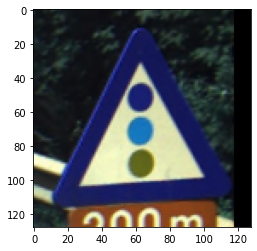

PREDICTION : The Image belongs to class : 11, with description : Traffic light ahead
ACTUAL : The Image belongs to class : 11, with description : Traffic light ahead


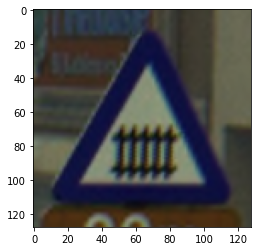

PREDICTION : The Image belongs to class : 12, with description : Watch out for railroad crossing with barriers ahead
ACTUAL : The Image belongs to class : 12, with description : Watch out for railroad crossing with barriers ahead


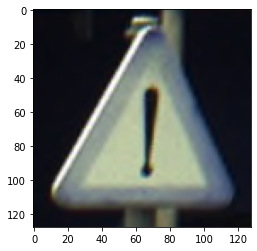

PREDICTION : The Image belongs to class : 13, with description : Watch out ahead for unknown danger
ACTUAL : The Image belongs to class : 13, with description : Watch out ahead for unknown danger


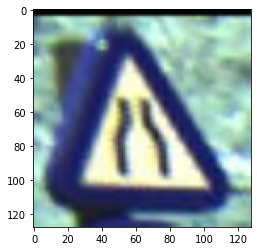

PREDICTION : The Image belongs to class : 14, with description : Warning for a road narrowing
ACTUAL : The Image belongs to class : 14, with description : Warning for a road narrowing


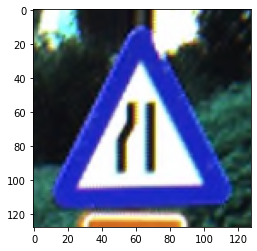

PREDICTION : The Image belongs to class : 14, with description : Warning for a road narrowing
ACTUAL : The Image belongs to class : 15, with description : Warning for a road narrowing on the left


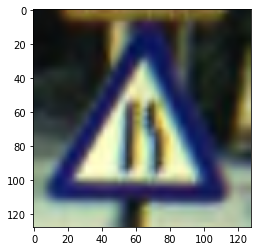

PREDICTION : The Image belongs to class : 14, with description : Warning for a road narrowing
ACTUAL : The Image belongs to class : 16, with description : Warning for a road narrowing on the right


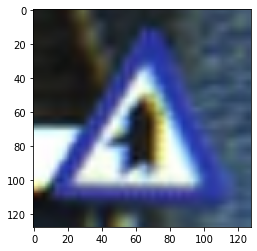

PREDICTION : The Image belongs to class : 17, with description : Warning for side road on the right
ACTUAL : The Image belongs to class : 17, with description : Warning for side road on the right


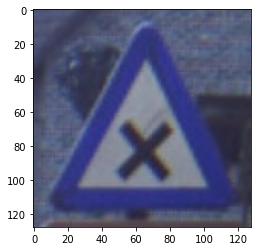

PREDICTION : The Image belongs to class : 18, with description : Warning for an uncontrolled crossroad
ACTUAL : The Image belongs to class : 18, with description : Warning for an uncontrolled crossroad


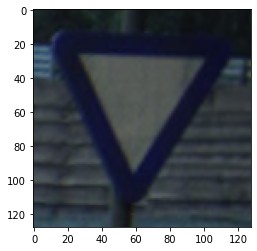

PREDICTION : The Image belongs to class : 19, with description : Give way to all drivers
ACTUAL : The Image belongs to class : 19, with description : Give way to all drivers


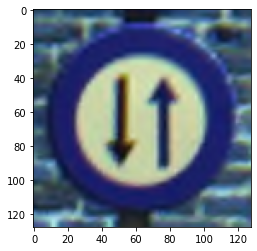

PREDICTION : The Image belongs to class : 20, with description : Road narrowing, give way to oncoming drivers
ACTUAL : The Image belongs to class : 20, with description : Road narrowing, give way to oncoming drivers


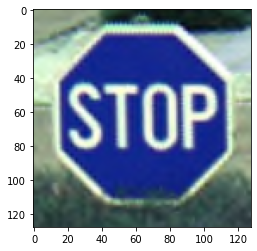

PREDICTION : The Image belongs to class : 21, with description : Stop and give way to all drivers
ACTUAL : The Image belongs to class : 21, with description : Stop and give way to all drivers


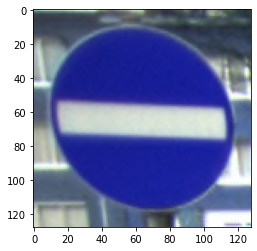

PREDICTION : The Image belongs to class : 22, with description : Entry prohibited (road with one-way traffic)
ACTUAL : The Image belongs to class : 22, with description : Entry prohibited (road with one-way traffic)


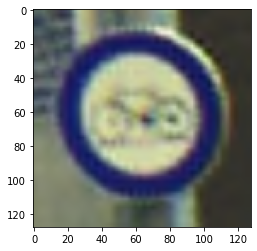

PREDICTION : The Image belongs to class : 23, with description : Cyclists prohibited
ACTUAL : The Image belongs to class : 23, with description : Cyclists prohibited


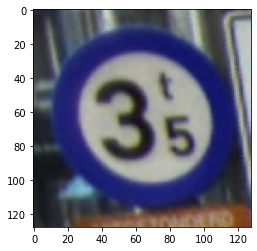

PREDICTION : The Image belongs to class : 24, with description : Vehicles heavier than indicated prohibited
ACTUAL : The Image belongs to class : 24, with description : Vehicles heavier than indicated prohibited


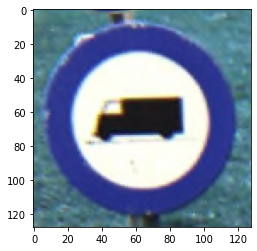

PREDICTION : The Image belongs to class : 25, with description : Trucks prohibited
ACTUAL : The Image belongs to class : 25, with description : Trucks prohibited


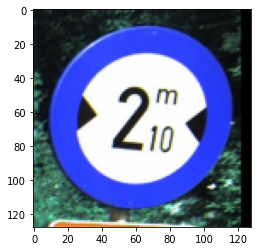

PREDICTION : The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)
ACTUAL : The Image belongs to class : 26, with description : Vehicles wider than indicated prohibited


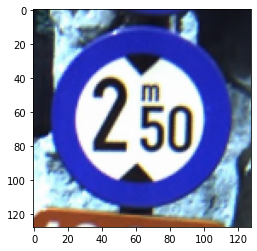

PREDICTION : The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)
ACTUAL : The Image belongs to class : 27, with description : Vehicles higher than indicated prohibited


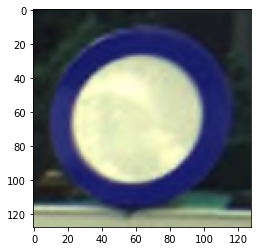

PREDICTION : The Image belongs to class : 28, with description : Entry prohibited
ACTUAL : The Image belongs to class : 28, with description : Entry prohibited


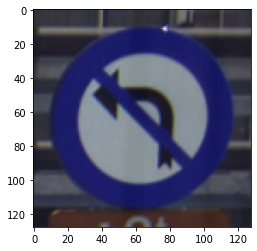

PREDICTION : The Image belongs to class : 29, with description : Turning left prohibited
ACTUAL : The Image belongs to class : 29, with description : Turning left prohibited


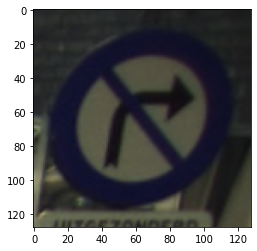

PREDICTION : The Image belongs to class : 30, with description : Turning right prohibited
ACTUAL : The Image belongs to class : 30, with description : Turning right prohibited


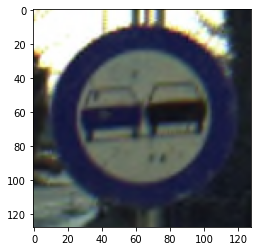

PREDICTION : The Image belongs to class : 31, with description : Overtaking prohibited
ACTUAL : The Image belongs to class : 31, with description : Overtaking prohibited


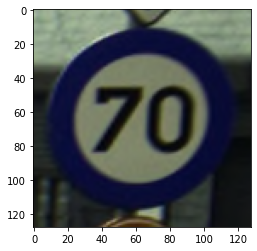

PREDICTION : The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)
ACTUAL : The Image belongs to class : 32, with description : Driving faster than indicated prohibited (speed limit)


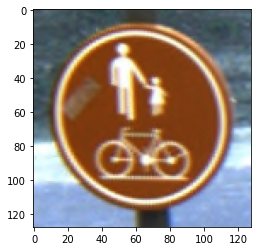

PREDICTION : The Image belongs to class : 33, with description : Mandatory shared path for pedestrians and cyclists
ACTUAL : The Image belongs to class : 33, with description : Mandatory shared path for pedestrians and cyclists


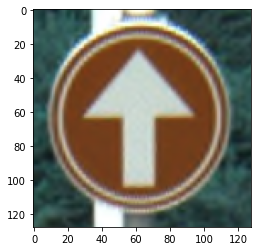

PREDICTION : The Image belongs to class : 34, with description : Driving straight ahead mandatory
ACTUAL : The Image belongs to class : 34, with description : Driving straight ahead mandatory


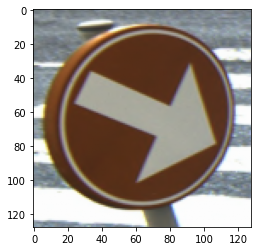

PREDICTION : The Image belongs to class : 35, with description : Mandatory left
ACTUAL : The Image belongs to class : 35, with description : Mandatory left


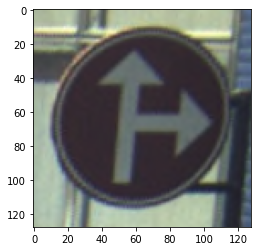

PREDICTION : The Image belongs to class : 36, with description : Driving straight ahead or turning right mandatory
ACTUAL : The Image belongs to class : 36, with description : Driving straight ahead or turning right mandatory


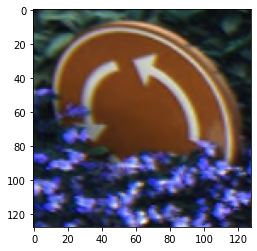

PREDICTION : The Image belongs to class : 37, with description : Mandatory direction of the roundabout
ACTUAL : The Image belongs to class : 37, with description : Mandatory direction of the roundabout


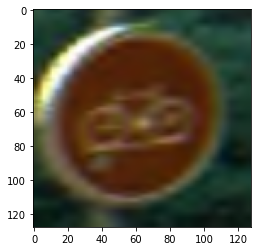

PREDICTION : The Image belongs to class : 38, with description : Mandatory path for cyclists
ACTUAL : The Image belongs to class : 38, with description : Mandatory path for cyclists


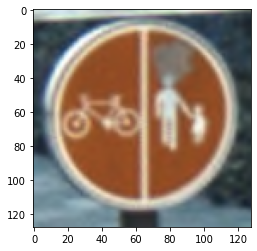

PREDICTION : The Image belongs to class : 39, with description : Mandatory divided path for pedestrians and cyclists
ACTUAL : The Image belongs to class : 39, with description : Mandatory divided path for pedestrians and cyclists


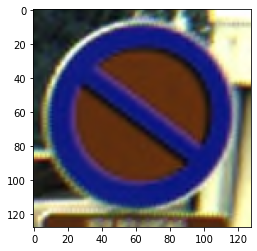

PREDICTION : The Image belongs to class : 40, with description : Parking prohibited
ACTUAL : The Image belongs to class : 40, with description : Parking prohibited


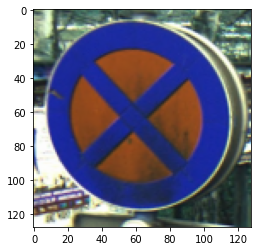

PREDICTION : The Image belongs to class : 41, with description : Parking and stopping prohibited
ACTUAL : The Image belongs to class : 41, with description : Parking and stopping prohibited


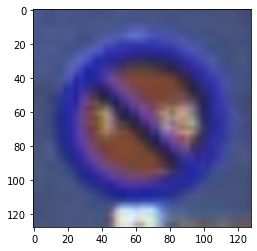

PREDICTION : The Image belongs to class : 43, with description : 
ACTUAL : The Image belongs to class : 42, with description : 


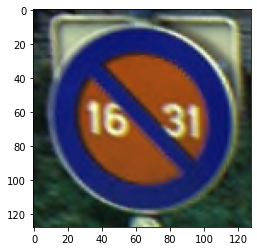

PREDICTION : The Image belongs to class : 43, with description : 
ACTUAL : The Image belongs to class : 43, with description : 


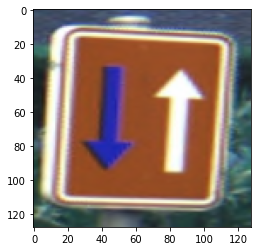

PREDICTION : The Image belongs to class : 44, with description : Road narrowing, oncoming drivers have to give way
ACTUAL : The Image belongs to class : 44, with description : Road narrowing, oncoming drivers have to give way


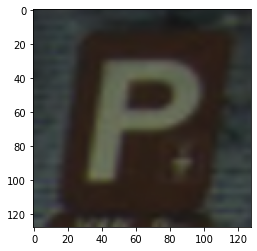

PREDICTION : The Image belongs to class : 45, with description : Parking is allowed
ACTUAL : The Image belongs to class : 45, with description : Parking is allowed


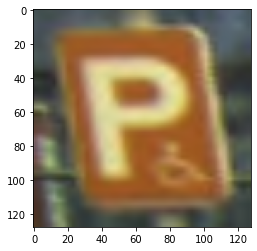

PREDICTION : The Image belongs to class : 46, with description : parking for handicapped
ACTUAL : The Image belongs to class : 46, with description : parking for handicapped


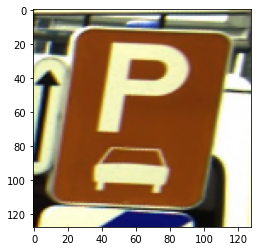

PREDICTION : The Image belongs to class : 47, with description : Parking for motor cars
ACTUAL : The Image belongs to class : 47, with description : Parking for motor cars


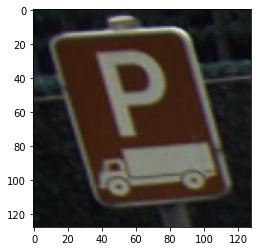

PREDICTION : The Image belongs to class : 47, with description : Parking for motor cars
ACTUAL : The Image belongs to class : 48, with description : Parking for goods vehicles


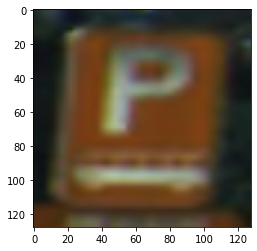

PREDICTION : The Image belongs to class : 47, with description : Parking for motor cars
ACTUAL : The Image belongs to class : 49, with description : Parking for buses


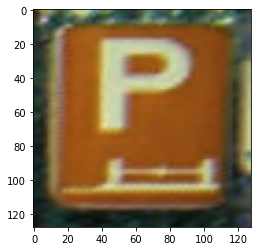

PREDICTION : The Image belongs to class : 50, with description : Parking only allowed on the sidewalk
ACTUAL : The Image belongs to class : 50, with description : Parking only allowed on the sidewalk


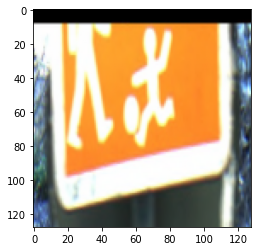

PREDICTION : The Image belongs to class : 51, with description : Begin of a residential area
ACTUAL : The Image belongs to class : 51, with description : Begin of a residential area


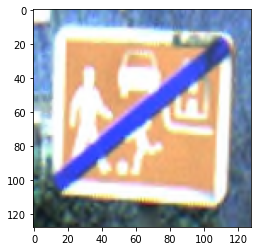

PREDICTION : The Image belongs to class : 52, with description : End of the residential area
ACTUAL : The Image belongs to class : 52, with description : End of the residential area


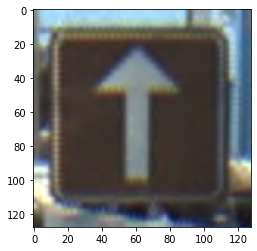

PREDICTION : The Image belongs to class : 53, with description : Road with one-way traffic
ACTUAL : The Image belongs to class : 53, with description : Road with one-way traffic


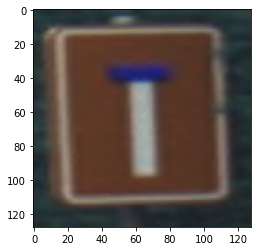

PREDICTION : The Image belongs to class : 54, with description : Dead end street
ACTUAL : The Image belongs to class : 54, with description : Dead end street


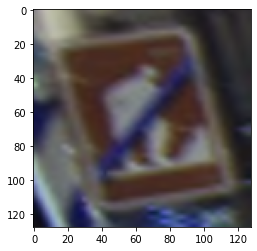

PREDICTION : The Image belongs to class : 55, with description : 
ACTUAL : The Image belongs to class : 55, with description : 


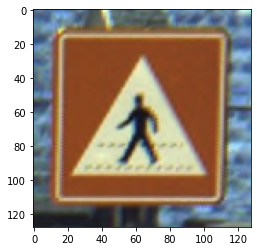

PREDICTION : The Image belongs to class : 56, with description : Crossing for pedestrians
ACTUAL : The Image belongs to class : 56, with description : Crossing for pedestrians


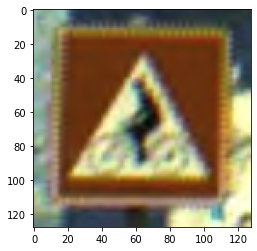

PREDICTION : The Image belongs to class : 57, with description : Crossing for cyclists
ACTUAL : The Image belongs to class : 57, with description : Crossing for cyclists


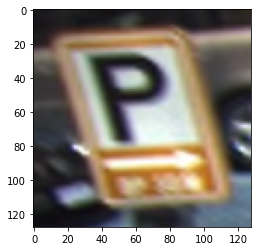

PREDICTION : The Image belongs to class : 58, with description : Parking exit
ACTUAL : The Image belongs to class : 58, with description : Parking exit


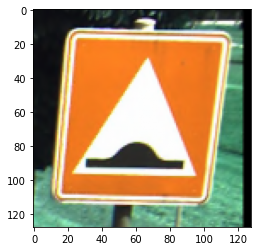

PREDICTION : The Image belongs to class : 59, with description : Information Sign : Speed bump
ACTUAL : The Image belongs to class : 59, with description : Information Sign : Speed bump


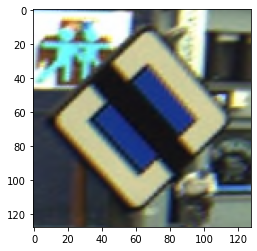

PREDICTION : The Image belongs to class : 60, with description : End of the priority road
ACTUAL : The Image belongs to class : 60, with description : End of the priority road


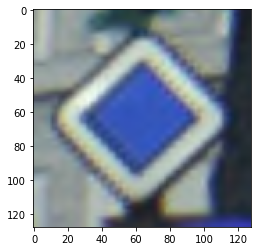

PREDICTION : The Image belongs to class : 61, with description : Begin of a priority road
ACTUAL : The Image belongs to class : 61, with description : Begin of a priority road


In [36]:


for i,img in enumerate(class_wise_test_img):
    show_img = img
    img_arr = np.expand_dims(img,axis=0) # to add new dimension to meet required input dims

    classes = model_regularized.predict(img_arr)

    plt.imshow(img)
     #plt.axis('off')
    plt.show()
    predicted_class = np.argmax(classes)
    print('PREDICTION : The Image belongs to class : {}, with description : {}'.format(predicted_class,classnames[predicted_class]))
    print('ACTUAL : The Image belongs to class : {}, with description : {}'.format(class_wise_test_labels[i],classnames[class_wise_test_labels[i]]))

### Saving the Model

In [38]:
# SAVE THE MODEL AS H5 File

file ="/content/drive/MyDrive/Colab_TS_DATA/"
model_regularized.save( file+'CNN_model.h5')

In [39]:
# Try out tensorflow saved model to save the model
tf.saved_model.save(model_regularized,file+'model_CNN_tf')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_TS_DATA/model_CNN_tf/assets
